When I tell people that I have a great pizza delivery dataset that I collected while delivering for Domino's with my wife,  one of the most common questions I get are:

*Who tips better, men or women?*
*Who gets better tips, you? or your wife?*

These are interesting questions but I think the follow-up questions are just as interesting. Which gender tips me, or my wife, better? And by how much? I certainly don't mean this analysis to be a battle of the genders, but it will be interesting to see what the statistics say!

![Domino's](http://www.pizzadelivery.org/Portals/0/ContentImages/xebra_dominos_store.jpg)

The very first question I want to answer is; are the overall means of tips different between me and Sammie, my wife?

**H0 : mu_a = mu_s**

**HA: mu_a != mu_s**

In [89]:
%matplotlib inline
import pandas as pd
import math
#import scipy.stats as stats #not working right now?
import numpy as np

path = r'C:\Users\angelddaz\OneDrive\Documents\data_training\data\RawDelData.csv' #please fix file location
data = pd.read_csv(path)

aDels = data.loc[data['PersonWhoDelivered']=='Angel'][['Tip']]
sDels = data.loc[data['PersonWhoDelivered']=='Sammie'][['Tip']]

mu_a = aDels.mean() #Angel Delivery mean = 3.376236
mu_s = sDels.mean() #Sammie Delivery mean = 3.412869
sigma_a = aDels.std() #Angel stdev = 2.184814
sigma_s = sDels.std() #Sammie stdev = 2.040795
variance_a = aDels.std() * aDels.std() #Angel variance = 4.773414
variance_s = sDels.std() * sDels.std() #Sammie variance = 4.164844
n_a = aDels.count() #Angel sample size = 712
n_s = sDels.count() #Sammie sample size = 589
degf = n_a + n_s - 2 -1 #n-k-1: degrees of freedom = 1298

#This is where the Hypothesis starts:
#Two Sample T Test
den1 = variance_a/n_a #formula chunk: 0.006704
den2 = variance_s/n_s #formula chunk: 0.007071
den3 = den1+den2      #formula chunk: 0.013775
den = math.sqrt(den3) #denominator value: 0.11736812016136079
num = mu_a - mu_s     #numerator value: -0.036633


t_crit = 1.9673
t_stat = num/den
print 't crit', t_crit
print 't stat:', float(t_stat), "\n"
print "Angel tip mean:$ %.2f" %mu_a
print "Sammie tip mean:$ %.2f" %mu_s
#print 'p val:'
#pval = 1-scipy.stats.t.sf(t_stat, df) #not working right now
#print pval

t crit 1.9673
t stat: -0.312123214059 

Angel tip mean:$ 3.38
Sammie tip mean:$ 3.41


My tip mean is 3.376236 and Sammie's tip mean is 3.412869. As a whole, they're pretty much the same.

**We fail to reject the null hypothesis that the two means are statistically the same, because our t_stat is much less absolute value than our t_crit.**


Now it's time to look at the data, no fancy statistics, just counts and means, broken down by genders.

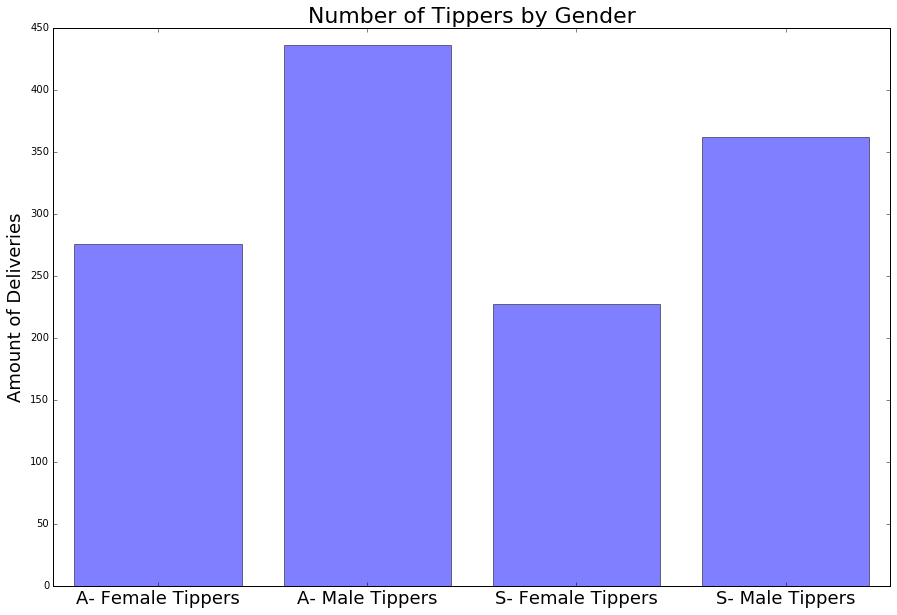

Angel- Female Tippers:  276
Angel- Male Tippers:  436
Sammie- Female Tippers:  227
Sammie- Male Tippers:  362


In [91]:
aDels = data.loc[data['PersonWhoDelivered']=='Angel'][['Tip', 'GenderOfTipper']]
sDels = data.loc[data['PersonWhoDelivered']=='Sammie'][['Tip', 'GenderOfTipper']]



#The next two for loops is duplicated later on through four lines of code.
#I did these counters two different ways to learn more about python and pandas.
afem = 0 #female tippers for me
amale = 0
sfem = 0
smale = 0 #female tippers for sam
for i in aDels['GenderOfTipper']:
    if i == 'Female':
        afem = afem + 1
    elif i == 'Male':
        amale = amale + 1
        
for i in sDels['GenderOfTipper']:
    if i == 'Female':
        sfem = sfem + 1
    elif i == 'Male':
        smale = smale + 1

import matplotlib.pyplot as pl

#building the first of four bar charts
objects = ('A- Female Tippers', 'A- Male Tippers', 'S- Female Tippers', 'S- Male Tippers')
y_pos = np.arange(len(objects))
xvals = [afem, amale, sfem, smale]

pl.bar(y_pos, xvals, align='center', alpha=0.5)
pl.xticks(y_pos, objects, fontsize=18)
pl.ylabel('Amount of Deliveries', fontsize=18)
pl.title('Number of Tippers by Gender', fontsize=22)
pl.rcParams['figure.figsize'] = (15, 10)
pl.show()

print "Angel- Female Tippers: ",afem
print "Angel- Male Tippers: ",amale
print "Sammie- Female Tippers: ",sfem
print "Sammie- Male Tippers: ",smale

The next step is to see the actual averages both Sam and I received from each gender:

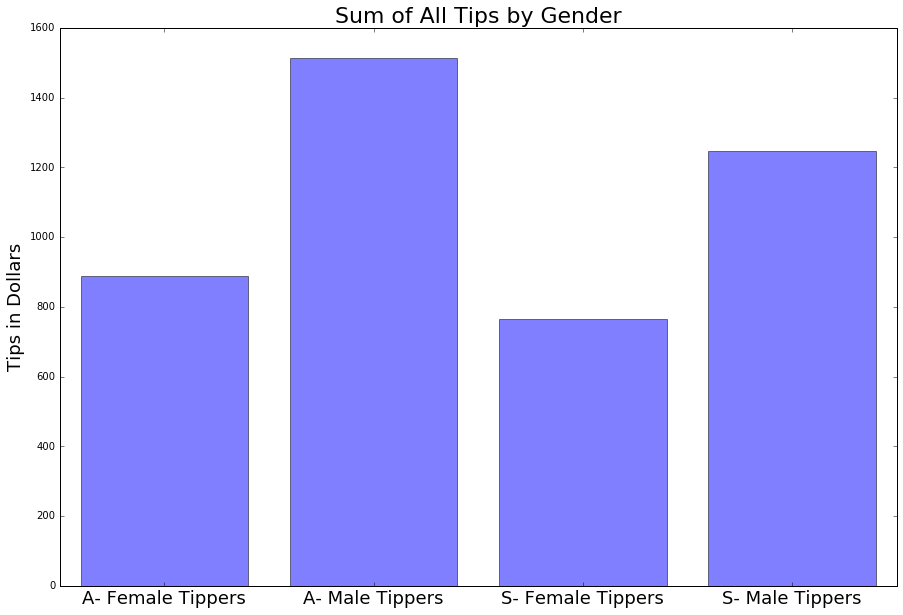

Sum of Angel Female Tips: $ 889.45
Sum of Angel Male Tips: $ 1514.43
Sum of Sammie Female Tips: $ 764.32
Sum of Sammie Male Tips: $ 1245.86 



In [69]:
#Grabbing all four sums
aFsum = aDels.loc[aDels['GenderOfTipper'] == 'Female', 'Tip'].sum() 
aMsum = aDels.loc[aDels['GenderOfTipper'] == 'Male', 'Tip'].sum()
sFsum = sDels.loc[sDels['GenderOfTipper'] == 'Female', 'Tip'].sum()
sMsum = sDels.loc[sDels['GenderOfTipper'] == 'Male', 'Tip'].sum()


#objects was created in the previous bar chart creation
xvals = [aFsum, aMsum, sFsum, sMsum]

pl.bar(y_pos, xvals, align='center', alpha=0.5)
pl.xticks(y_pos, objects, fontsize=18)
pl.ylabel('Tips in Dollars', fontsize=18)
pl.title('Sum of All Tips by Gender', fontsize=22)
pl.rcParams['figure.figsize'] = (15, 10)
pl.show()

print "Sum of Angel Female Tips: $", aFsum
print "Sum of Angel Male Tips: $", aMsum
print "Sum of Sammie Female Tips: $", sFsum
print "Sum of Sammie Male Tips: $", sMsum, "\n"

#The following lines are to confirm that my 'queries' work. They seem to have worked.
#x = aDels.loc[data['GenderOfTipper']=='Female'][['Tip', 'GenderOfTipper']] #Angel Female deliveries
#print x.tail() 
#x = sDels.loc[sDels['GenderOfTipper'] == 'Male'][['Tip', 'GenderOfTipper']] #Angel Female deliveries
#print x.tail() 

Sums alone can be misleading without context. These bars seem to match the proportions of the first bar chart, which showed number of tippers.

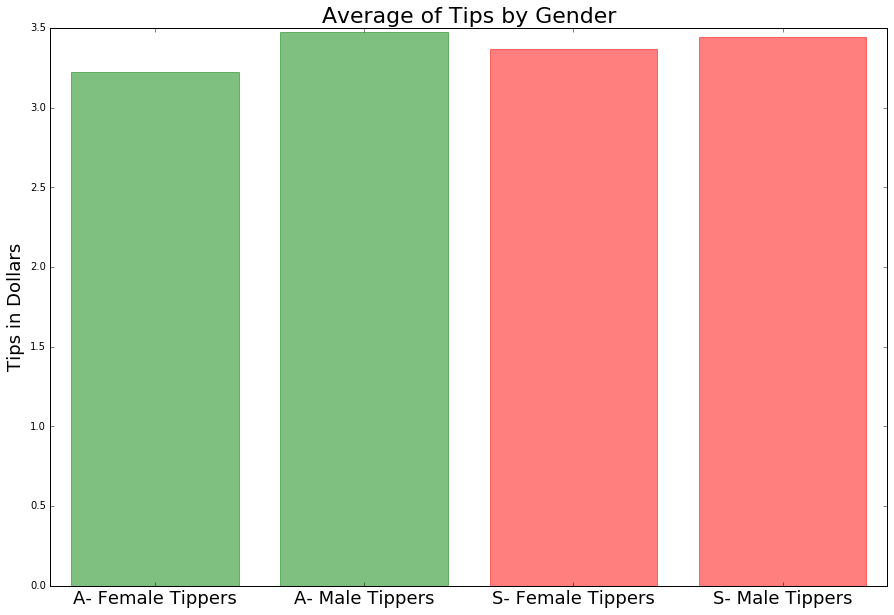

Avg of Angel Female Tips: $ 3.22
Avg of Angel Male Tips: $ 3.47
Avg of Sammie Female Tips: $ 3.37
Avg of Sammie Male Tips: $ 3.44 



In [70]:
#Now to grab all four counts
aFcount = aDels.loc[aDels['GenderOfTipper'] == 'Female', 'Tip'].count()
aMcount = aDels.loc[aDels['GenderOfTipper'] == 'Male', 'Tip'].count()
sFcount = sDels.loc[sDels['GenderOfTipper'] == 'Female', 'Tip'].count()
sMcount = sDels.loc[sDels['GenderOfTipper'] == 'Male', 'Tip'].count()


#Finally Averages
#Here is where it starts to get interesting:
aFavg = aFsum / aFcount
aMavg = aMsum / aMcount
sFavg = sFsum / sFcount
sMavg = sMsum / sMcount

#objects was created in the first bar chart creation
xvals = [aFavg, aMavg, sFavg, sMavg]

barlist = pl.bar(y_pos, xvals, align='center', alpha=0.5)
pl.xticks(y_pos, objects, fontsize=18)
barlist[0].set_color('g') #for the heck of it
barlist[1].set_color('g')
barlist[2].set_color('r')
barlist[3].set_color('r')
pl.ylabel('Tips in Dollars', fontsize=18)
pl.title('Average of Tips by Gender', fontsize=22)
pl.rcParams['figure.figsize'] = (15, 10)
pl.show()

print "Avg of Angel Female Tips: $ %.2f" %aFavg
print "Avg of Angel Male Tips: $ %.2f" %aMavg
print "Avg of Sammie Female Tips: $ %.2f" %sFavg
print "Avg of Sammie Male Tips: $ %.2f" %sMavg, "\n"

This is a good place to pause and have a slice of pizza.

On the surface, it seems like men tip better to the both of us. The dataset is large enough to where further statistics might just prove what this latest bar chart is telling us and I will leave this statistical rigour to another notebook.

1. Men tip both of us better than women.
2. Women tip Sammie (relatively*) much better than they tip me.

Just to save you the scrolling up, the overall averages between Sammie and I were:

*15 cents is a lot when the mirror disparity (AMale-SMale) is 3 cents

In [71]:
print "Angel overall tip mean: $ %.2f" %mu_a
print "Sammie overall tip mean: $ %.2f" %mu_s

Angel overall tip mean: $ 3.38
Sammie overall tip mean: $ 3.41


With the overall means context, ranking the 3 buckets in ascending order for each of us shows these jumps:


    
The perceptible difference between our standard deviations comes to the forefront of my mind:

In [132]:
print "Ranking of Avg Tips for me:"
df = pd.Series(["$%.2f (+0.00)" %aFavg, "$%.2f (+0.16)" %mu_a, "$%.2f (+0.09)" %aMavg], index=['Women:', 'Overall:', 'Men:'])
print df , "\n\n"

print "Ranking of Avg Tips for Sammie:"
df = pd.Series(["$%.2f (+0.00)" %sFavg, "$%.2f (+0.03)" %mu_s, "$%.2f (+0.03)" %sMavg], index=['Women:', 'Overall:', 'Men:'])
print df , "\n\n"


#Finally, to get the overall mean for the both of us:
data = pd.read_csv(path)
bothDels = data.loc[data['Tip']>=-10.00][['Tip']]
mu_b = bothDels.mean()

print "Ranking of All Seven Avg Tips:"
df = pd.Series(["$%.2f (+0.00)" %aFavg, "$%.2f (+0.15)" %sFavg, "$%.2f (+0.01)" %mu_a, "$%.2f (+0.02)" %mu_b, 
                "$%.2f (+0.03)" %mu_s, "$%.2f (+0.03)" %sMavg, "$%.2f (+0.03)" %aMavg], 
               index=['A-Women:', 'S-Women:', 'A-Overall:', 'Both-Overall:', 'S-Overall:', "S-Men:", 'A-Men:'])
print df

Ranking of Avg Tips for me:
Women:      $3.22 (+0.00)
Overall:    $3.38 (+0.16)
Men:        $3.47 (+0.09)
dtype: object 


Ranking of Avg Tips for Sammie:
Women:      $3.37 (+0.00)
Overall:    $3.41 (+0.03)
Men:        $3.44 (+0.03)
dtype: object 


Ranking of All Seven Avg Tips:
A-Women:         $3.22 (+0.00)
S-Women:         $3.37 (+0.15)
A-Overall:       $3.38 (+0.01)
Both-Overall:    $3.39 (+0.02)
S-Overall:       $3.41 (+0.03)
S-Men:           $3.44 (+0.03)
A-Men:           $3.47 (+0.03)
dtype: object


In [95]:
print "Angel stdev: %.4f" %sigma_a
print "Sammie stdev: %.4f" %sigma_s

Angel stdev: 2.1848
Sammie stdev: 2.0408


I think the biggest lesson I learned from this notebook is that statistics and probability may be presented in a binary:

**1. FAIL TO REJECT NULL**

**2. REJECT NULL**

in which problems are meant to be computed (I think partly for ease of learning), but reality is not always like this. Here we have a case where there is a nuanced difference between the tips Sammie and I were getting. I may have been getting overall a tiny less on tips* , but men were tipping me better than her, and women were tipping her better than me. In the last mini-spreadsheet here, there is a very interesting symmetry of tip averages as well.

This gender-preference may also be part of the root cause of the difference between our two standard deviations. It's not that much, but it's there, and that's what teaches me that I may be dealing with a question that requires judgment, care, and wisdom to not be too hasty to jump to conclusions.

*3 cents or statistically no difference as seen by the only Hypothesis test in this notebook